## topics

* data types in pytorch
* stochastic gradient descend with mini-batches

## Data types in pytorch

* float: floating point number
* double: floating point number with higher precision (double)
* long: even more precise (only integer, no floats)



* some (loss, activation) function restrict the data type
* easy to convert with val.float() etc.

In [ ]:
# some operations with tensors

import torch as T
X = T.tensor([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]], dtype=T.float32)
print(X,"\n")

X = X.view(1,12)  # or reshape(1,12)
print(X,"\n")

X = X.view(3,-1)
print(X)

In [ ]:
X = T.tensor([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]], dtype=T.double)

Y = X.view(1,3,4)
print(Y)

Y = Y.squeeze()
print(Y)

In [ ]:
X = T.tensor([[1.2,2.3,3.4,4.5],
              [5.,6.,7.,8.],
              [9.,10.,11.,12.]], dtype=T.long)

print(X)
X = X.flatten()
X

In [ ]:
x=T.Tensor([[1.0,2.0],[3.,4.]])
x,x.view(1,-1),x.view(-1,1)   # -1 means that the col or row is automatically set

In [ ]:
# tensor and numpy arrays

x=T.Tensor([1.0,2.0])
x,x.numpy()

In [ ]:
x=torch.Tensor([1.0,2.0])
x.requires_grad=True
x.numpy()                   # raises an error 

In [ ]:
x=T.Tensor([1.0,2.0])
x.requires_grad=True
x.detach().numpy()    

## Stochastic Gradient Descend (SGD)

* in gradient descend, in order to fix the gradient, ALL training examples are used in each step
* given a huge dataset, this is not feasible or at least very inefficient
* $i$ ranges over all $n$ examples

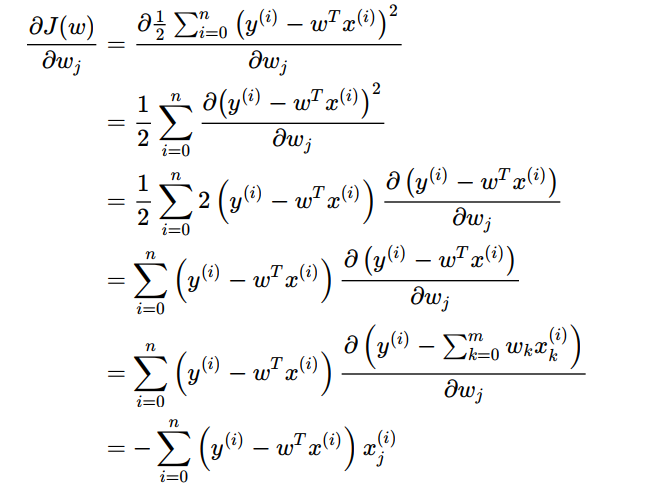

* in stochastic gradient descend only a single (randomly picked) example is used
* or alternatively, we use a batch of randomly picked examples, a so-called mini-batch

PyTorch provides a class that allows for the usage of such a mini-batch functionality: DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyMapDataset(Dataset):

    def __init__(self,data):
        self.data=data

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]


data=[0,1,2,3,4,5,6,7,8,9,10,11]

map_dataset = MyMapDataset(data)

loader = DataLoader(map_dataset, batch_size=4)

for batch in loader:
    print(batch)